In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [ ]:

ascentDf = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/valorant-stats/master/agents_data/ascent/agents_competitive_tier%3D10.csv")
bindDf = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/valorant-stats/master/agents_data/bind/agents_competitive_tier%3D10.csv")
breezeDf = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/valorant-stats/master/agents_data/breeze/agents_competitive_tier%3D10.csv")
havenDf = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/valorant-stats/master/agents_data/haven/agents_competitive_tier%3D10.csv")
splitDf = pd.read_csv("https://raw.githubusercontent.com/Giridhar88/valorant-stats/master/agents_data/split/agents_competitive_tier%3D10.csv")


Text(0, 0.5, 'WinRate')

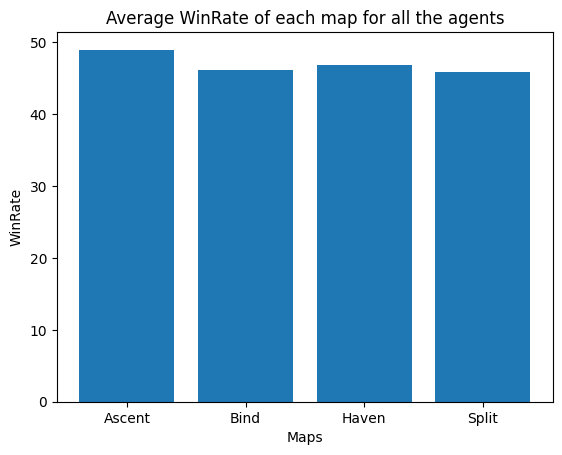

In [ ]:
p = r"\d+\.*\d*"
def avg(s):
  sum = 0
  for i in s:
    r = re.search(p,i)
    sum += float(r.group())
  average = sum/len(s)
  return average
avgAscent = avg(ascentDf.loc[:,"Win Rate"])
avgBind = avg(bindDf.loc[:,"Win Rate"])
avgHaven = avg(havenDf.loc[:,"Win Rate"])
avgSplit = avg(splitDf.loc[:, "Win Rate"])
x = ["Ascent", "Bind", "Haven", "Split"]
y = [avgAscent, avgBind, avgHaven, avgSplit]
fig = plt.bar(x, y)
plt.title("Average WinRate of each map for all the agents")
plt.xlabel("Maps")
plt.ylabel("WinRate")

Text(0.5, 1.0, 'Average winrate of each agent throught the maps')

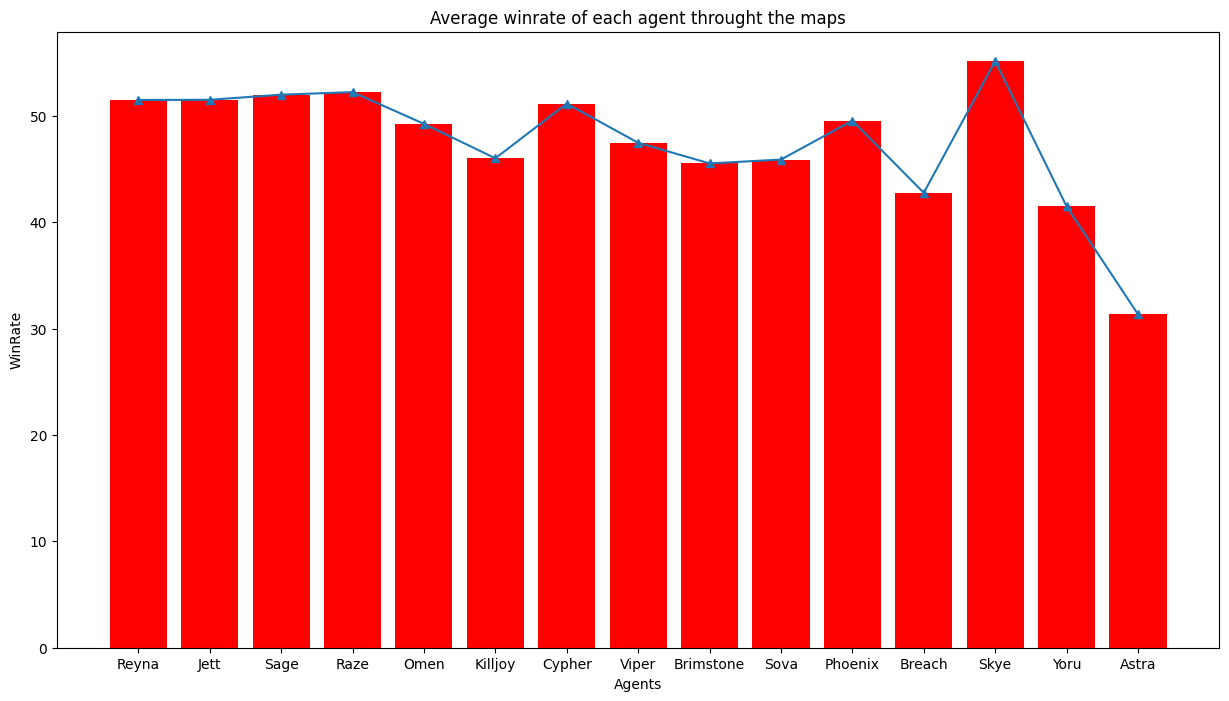

In [ ]:
maps = [ascentDf, bindDf, breezeDf, havenDf, splitDf]
avg = []
agents=[]
p = r"\d+\.*\d*"
for agent in range(15):
  sum = 0
  for map in maps:
    map.sort_values(by=["Agent Name"], inplace = True)
    r = re.search(p,map.loc[agent, "Win Rate"])
    sum = sum + float(r.group())
  agents.append(map.loc[agent, "Agent Name"])
  a = sum/len(maps)
  avg.append(a)
plt.figure(figsize=(15,8))
plt.bar(agents,avg, color = "Red")
plt.plot(agents,avg,'-^')
plt.xlabel("Agents")
plt.ylabel("WinRate")
plt.title("Average winrate of each agent throught the maps")


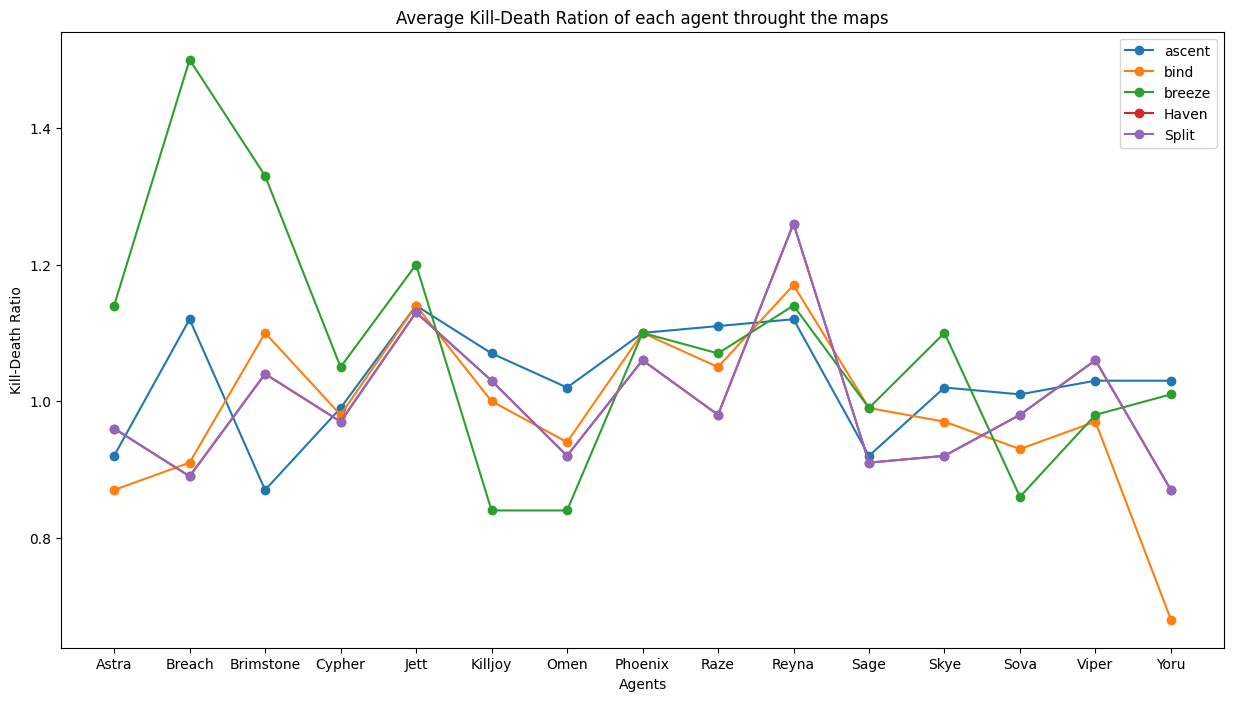

In [ ]:
plt.figure(figsize=(15,8))
plt.xlabel("Agents")
plt.ylabel("Kill-Death Ratio")
plt.title("Average Kill-Death Ration of each agent throught the maps")
maps_name = ["ascent", "bind",  "breeze", "Haven", "Split"]
for map in maps:
  map.sort_values(by=["Agent Name"], inplace = True)
  plt.plot(map.loc[:,"Agent Name"], map.loc[:,"KD"],'-o')
  plt.legend(maps_name)



Text(0.5, 1.0, 'Average')

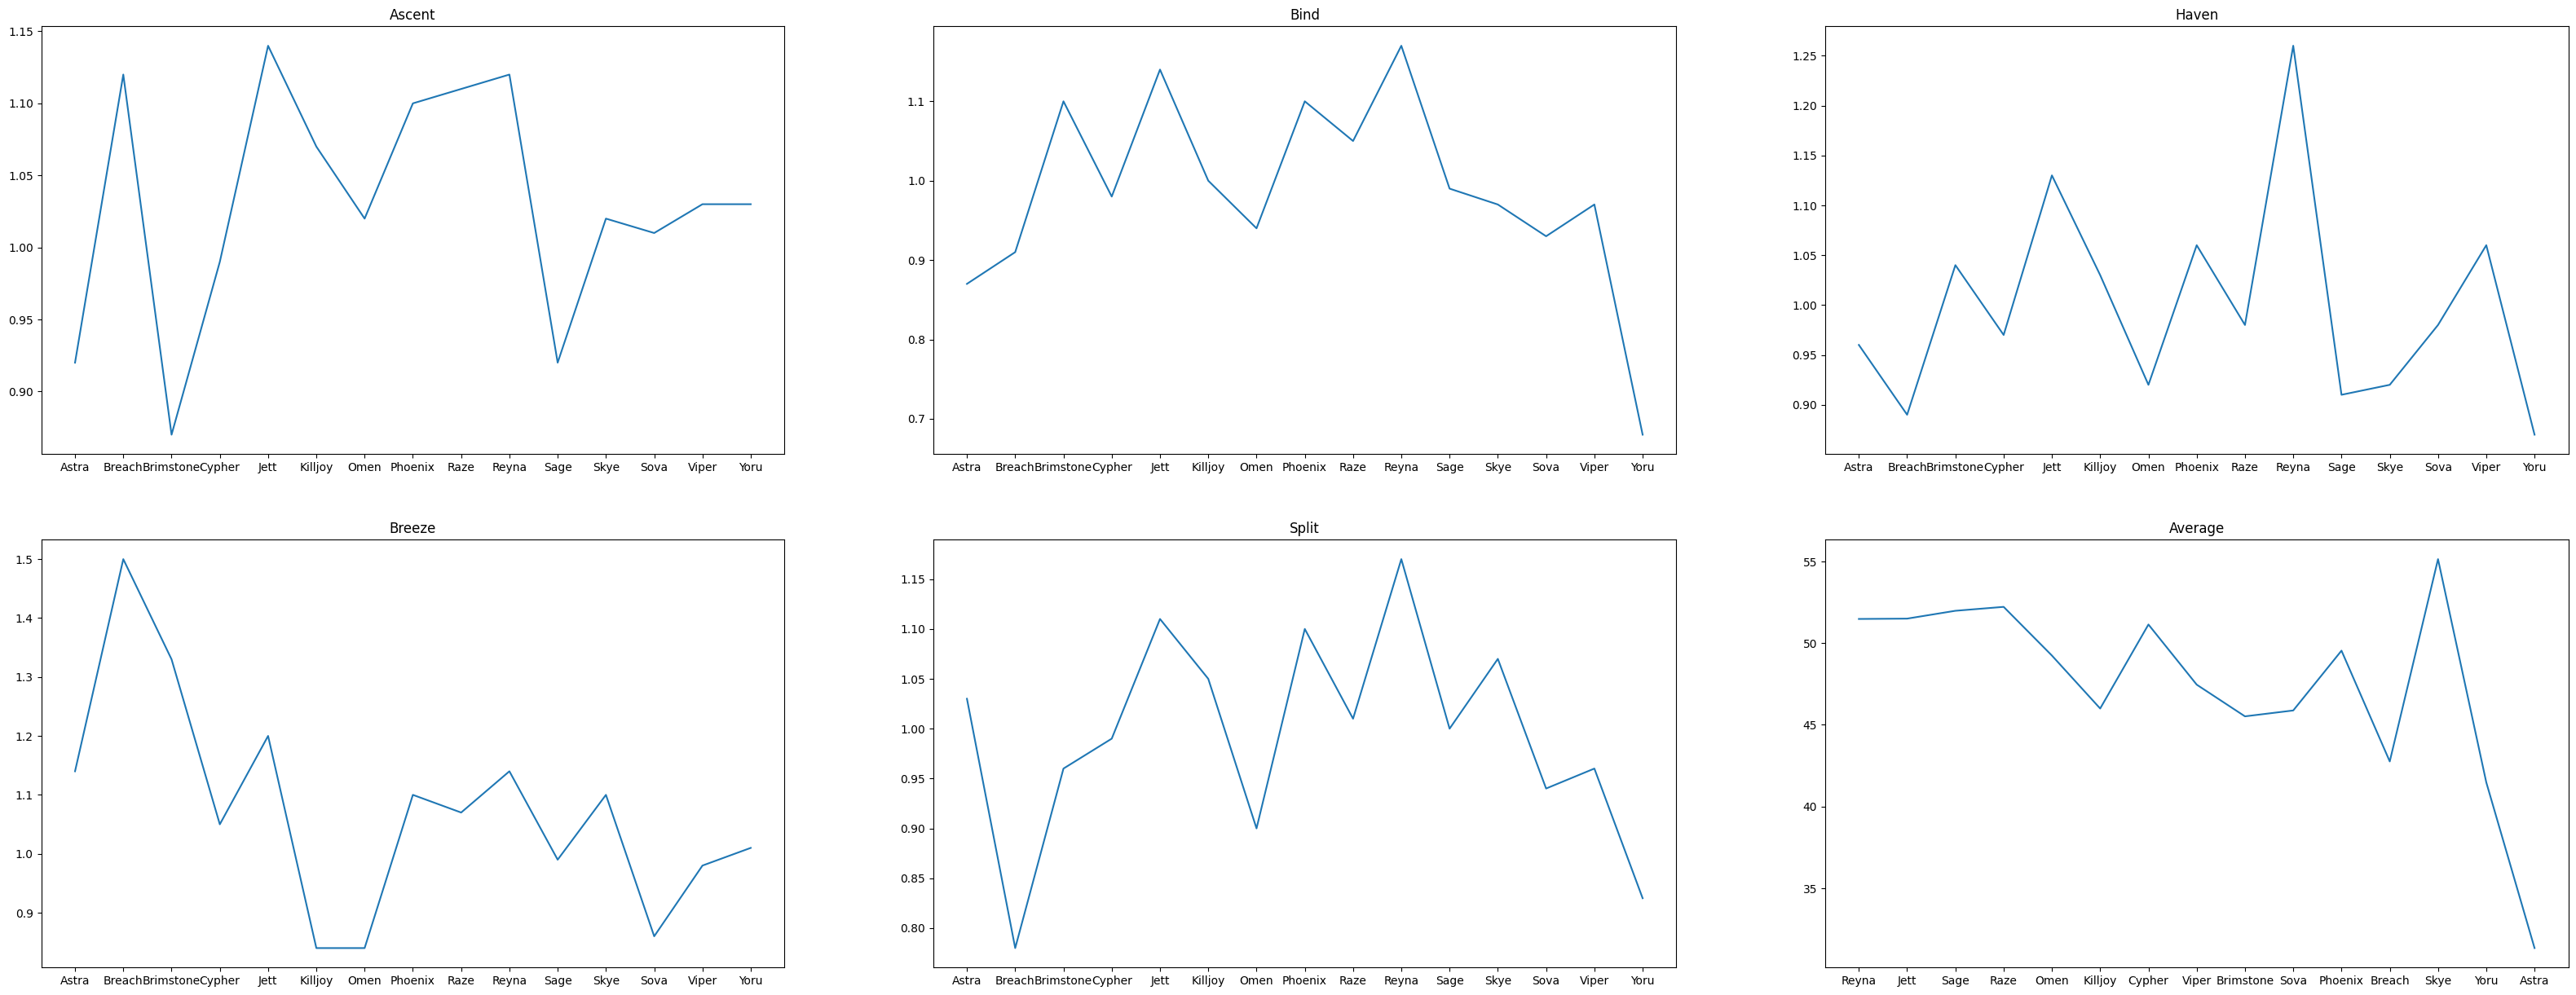

In [ ]:
fig,axes = plt.subplots(2,3)
fig.set_figheight(15)
fig.set_figwidth(40)

axes[0,0].plot(ascentDf.loc[:,"Agent Name"],ascentDf.loc[:,"KD"])
axes[0,0].set_title("Ascent")
axes[0,1].plot(bindDf.loc[:,"Agent Name"],bindDf.loc[:,"KD"])
axes[0,1].set_title("Bind")
axes[0,2].plot(havenDf.loc[:,"Agent Name"],havenDf.loc[:,"KD"])
axes[0,2].set_title("Haven")
axes[1,0].plot(breezeDf.loc[:,"Agent Name"],breezeDf.loc[:,"KD"])
axes[1,0].set_title("Breeze")
axes[1,1].plot(splitDf.loc[:,"Agent Name"],splitDf.loc[:,"KD"])
axes[1,1].set_title("Split")
axes[1,2].plot(agents,avg,"-")
axes[1,2].set_title("Average")
